NEW FILE FOR THE CAR SALES

-------------------------------------------------------------------

This is a supervised learning problem. We have the output of each observation and we are going to predict this output and come up with the best estimations possible for each observation.

In [14]:
#Get path (independently from who is running the command)

import os
os.getcwd()

'c:\\Users\\Jaume\\Documents\\MDDB\\AI\\AI_Group11_Project\\AI_Group7_Assignment'

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import PredefinedSplit, GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, precision_recall_curve
import matplotlib.pyplot as plt
from plotnine import *
import os
import datetime
import pickle
import json

**PHASE 1: READ AND CLEAN DATA**

In [16]:
os.listdir(os.path.join('..', 'car_prices')) # independent of the platform (unix, windows)

## We read the files
car_sales_data_path = os.path.join("..", "car_prices", "car_prices.csv")
Car_Sales_Dataframe = pd.read_csv(car_sales_data_path, on_bad_lines= "skip")

In [17]:
Car_Sales_Dataframe

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558806,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,4.5,18255.0,silver,black,avis corporation,35300,33000,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558807,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558808,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558809,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [18]:
# We are going to check if there are NaN values

# Count NaN values in each column
nan_counts = Car_Sales_Dataframe.isna().sum()

# Display the count of NaN values
print("\nCount of NaN values in each column:")
print(nan_counts)

#We drop the NaN values

Car_Sales_Dataframe.dropna()


Count of NaN values in each column:
year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 0
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558805,2011,BMW,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,3.9,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300,22800,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT)
558807,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558808,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558809,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


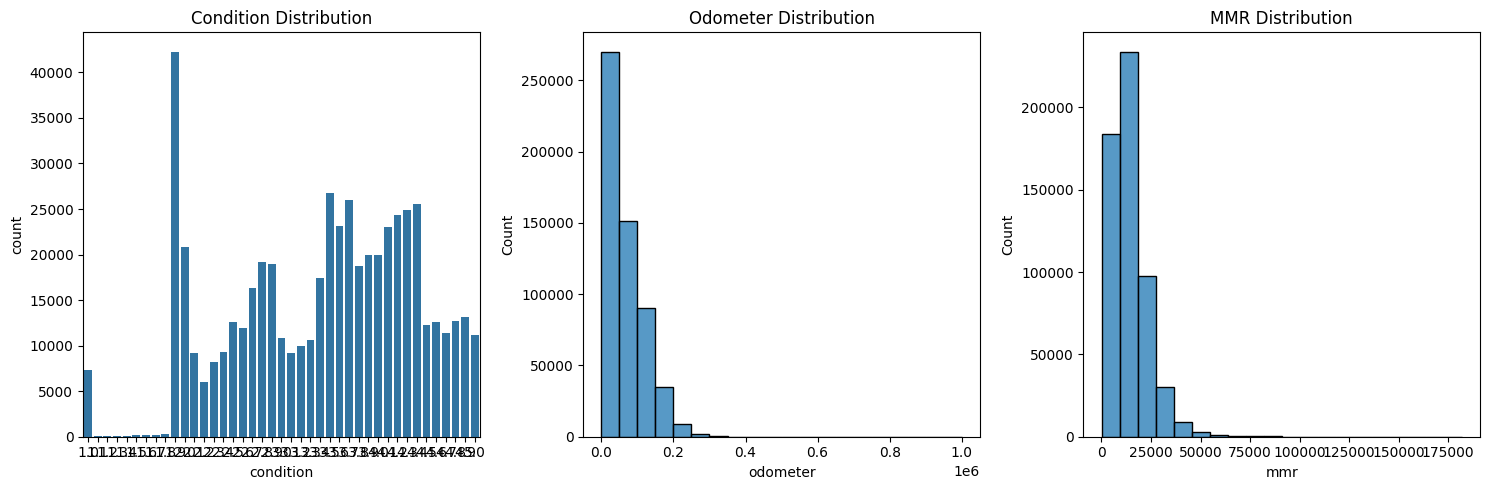

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up a 1x3 grid for subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot for 'condition'
sns.countplot(x='condition', data=Car_Sales_Dataframe, ax=axes[0])
axes[0].set_title('Condition Distribution')

# Plot for 'odometer'
sns.histplot(x='odometer', data=Car_Sales_Dataframe, ax=axes[1], bins=20)
axes[1].set_title('Odometer Distribution')

# Plot for 'mmr'
sns.histplot(x='mmr', data=Car_Sales_Dataframe, ax=axes[2], bins=20)
axes[2].set_title('MMR Distribution')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()
        

Dataset Splitting

In [ ]:
# We will make the data set split to have a train set, a validation set and a test set
# code obtained from the tutorial scripts from Riccardo

class TrainTestSplitter(object):
    '''Class to perform the split of the data into train, test, and validation.
    '''
    def __init__(self, train_frac=0.8, validation_frac=0.2, seed=1234):
        self.train_frac = train_frac
        self.validation_frac = validation_frac
        self.seed = seed
    
    def calculate_statistics(self):
        statistics = {}
        for i in ['train_set', 'test_set', 'validation_set']:
            split_stats = {}
            default_count = (getattr(self, i).groupby('default').size().reset_index())
            split_stats['N_defaults'] = (default_count.loc[lambda x: x.default ==1, 0].iloc[0])
            split_stats['percentage_total_defaults'] = split_stats['N_defaults']/self.total_n_defaults * 100
            split_stats['N_not_defaults'] = default_count.loc[lambda x: x.default == 0, 0].iloc[0]
            split_stats['percentage_total_not_defaults'] = split_stats['N_not_defaults']/self.total_n_not_defaults * 100
            statistics[i] = split_stats
        self.split_statistics = statistics

    def split_train_test(self, df):
        print("Generating the train/validation/test splits...")
        self.total_n_defaults = df.loc[lambda x: x.default == 1].shape[0]
        self.total_n_not_defaults = df.loc[lambda x: x.default == 0].shape[0]
        self.train_set = df.sample(frac=self.train_frac, random_state=self.seed)
        self.test_set = df.loc[lambda x: ~x.id.isin(self.train_set.id)].reset_index(drop=True)
        self.validation_set = self.train_set.sample(frac=self.validation_frac).reset_index(drop=True)
        self.train_set = self.train_set.loc[lambda x: ~x.id.isin(self.validation_set.id)].reset_index(drop=True)
        print("calculating the statistics...")
        self.calculate_statistics()
        print("split completed")

In [30]:
from sklearn.preprocessing import LabelEncoder

# We will now standarize the categorical columns so we can use them as features in out model

def standarize_Data ():

    # 1. fit a one hot encoder transformer to the TRAIN SET. The object we obtain will be reused later, to transform our data
    # note: it is important that these transformers are fitted only on the train data.
    one_hot_encoder = OneHotEncoder() # one hot encoder is a class instance
    _ = one_hot_encoder.fit(fitting_splits.train_set[['make', 'model', 'trim', 'body', 'transmission', 'state', 'color', 'interior', 'seller']]) # we can fit the encoder instance on the columns that need to be transformed.
    
    one_hot_encoder.categories_ # after we fit the encoder, the instance learns which values are present in each data column.
    encoded_names = one_hot_encoder.get_feature_names_out() # with this method we can retrieve the names of the new dummy columns that have been computed
    encoded_names
    encoded_categories = one_hot_encoder.transform(fitting_splits.train_set[['make', 'model', 'trim', 'body', 'transmission', 'state', 'color', 'interior', 'seller']]).toarray() # at this point, we can use the fitted encoder to transform any array with a sex and marriage column; not just the training set, but also the validation or test set. The encoder will take that array of shape (M,2) and transform it to an array of shape (M, N), where N is the total number of distinct possible values for the encoded features. The values of the new array will be either 0 or 1, encoding whether that value of the feature applies to the row.
    df_encoded = pd.DataFrame(encoded_categories)
    df_encoded.columns = encoded_names
    df_encoded

standarize_Data

<function __main__.standarize_Data()>

Once we have standarized the data and we have made the splits necessary, we will start with some modelling

In [31]:
Car_Sales_Dataframe

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558806,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,4.5,18255.0,silver,black,avis corporation,35300,33000,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558807,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558808,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558809,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


**PHASE 2: DESCRIPTIVE ANALYSIS**

In [21]:
Car_Sales_Dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


In [22]:
Car_Sales_Dataframe.isnull().sum().sort_values(ascending = False)


transmission    65353
body            13195
condition       11794
trim            10651
model           10399
make            10301
color             749
interior          749
odometer           94
year                0
vin                 0
state               0
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

In [23]:
numbers = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']
categories = ['make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'color', 'interior', 'seller', 'saledate']

In [24]:
Car_Sales_Dataframe[numbers].describe()


,year,condition,odometer,mmr,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13769.324646,13611.262461
std,3.966812,0.949439,53397.752933,9679.874607,9749.656919
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


Key observations:

1. **Year, Condition, Odometer:**
   - No issues with the minimum and maximum values.
   - All values in these columns make sense and fall within reasonable ranges.

2. **Year, Condition, Odometer, MMR, Selling Price:**
   - There is a difference between the mean and median for Year, Condition, Odometer, MMR, and Selling Price.
   - This difference could indicate the presence of outliers in the data, skewing the mean away from the median.
   - Outliers can significantly impact statistical measures, so it's important to investigate and possibly handle them during data preprocessing.

3. **MMR Column:**
   - The minimum range value in the MMR column is quite far from the mean and median.
   - Further review during preprocessing is needed to understand the nature of these extreme values.
   - Outliers in MMR may be indicative of rare cases or errors in the data and might need special treatment (e.g., removal or transformation).

4. **Anomaly in Minimum Selling Price:**
   - There is an anomaly in the minimum selling price value, suspected to be unknown data.
   - The data is imputed with a value of 1, or it might represent instances where the car is sold as part of a company program (gift).
   - Imputation of missing or unknown values is a common preprocessing step, and using a value of 1 might be reasonable if it indicates a placeholder or default value.